# Introduction to Linear Modeling in Python

* Use python to build, evaluate, and apply linear models
* Use matplotlib, numpy, scipy, stats models, and scikit-learn
* Before we build model, we'll use explaratory data analysis, visualization, descriptive statistic to chracterize the data to be modeled
* Then, we build models and use them to make predictions,
* Finally, we'll explore how linear regression relates to inferential statistics, with an introductio to model
### Reasons for Modeling: Interpolation
One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable distances for a given independent variable times that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.


In [6]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [36]:
distance = np.array([   0.        ,   44.04512153,  107.16353484,  148.43674052,
        196.39705633,  254.4358147 ,  300.        ])
times = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

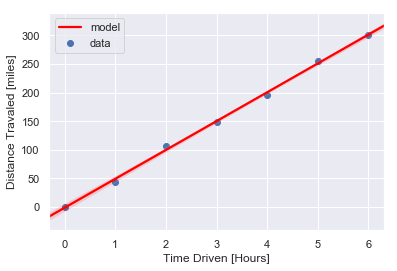

In [37]:
plt.scatter(times, distance, label='data')
sns.regplot(times, distance, scatter=None,color='red', label='model')
plt.xlabel('Time Driven [Hours]')
plt.ylabel('Distance Travaled [miles]')
plt.legend()

In [38]:
# Compute the total change in distance and change in time
#substract the last variable then first one
total_distance = distance[-1] -distance[0]
total_times =  times[-1] - times[0]
print('Total distance is ' +str(total_distance)+' and total times is '+str(total_times))


Total distance is 300.0 and total times is 6.0


In [39]:
# Estimate the slope of the data from the ratio of the changes
avarage_speed = total_distance/total_times
print('Avarage speed is ', avarage_speed)

Avarage speed is  50.0


In [40]:
# Predict the distance traveled for a time not measured
#we don;t have any data point on 2.5 hours, Let's find out the distance 
elapse_time = 2.5
distance_traveled = avarage_speed * elapse_time
print('The distance traveled in 2.5 hour is', distance_traveled)
"""Notice that the answer distance is 'inside' that range of data values, so, less than the max(distances) but greater than the min(distances)"""

The distance traveled in 2.5 hour is 125.0


"Notice that the answer distance is 'inside' that range of data values, so, less than the max(distances) but greater than the min(distances)"

### Reasons for Modeling: Extrapolation
Another common use of modeling `extrapolation` to estimate data values `"outside"` or `"beyond"` the range (min and max values of time) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model `distance = model(time)`. Use that model() to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

In [34]:
#Let's define model fisrt
def  model(time):
    total_distance = distance[-1] -distance[0]
    total_times =  times[-1] - times[0]
    avarage_speed = total_distance/total_times
    return (avarage_speed*time)


In [43]:
#selected time
time =8
# use model function to calcalate distnce
distance_time = model(time)
print('Estimated 8 hour distnce is ', distance_time)

#If your car can travel, at most, 400 miles on a full tank, and it takes 8 hours to drive home, 
#will you make it without refilling?
answer = (distance_time <= 400)
print(answer)

Estimated 8 hour distnce is  400.0
True


### Reasons for Modeling: Estimating Relationships
Another common application of modeling is to compare two data sets by building models for each, and then comparing the models. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function efficiency_model(miles, gallons) to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries car1 and car2, which both have keys car['miles'] and car['gallons'].

In [47]:
car1 = {'gallons': np.array([  0.        ,   1.66666667,   3.33333333,   5.        ,
          6.66666667,   8.33333333,  10.        ,  11.66666667,
         13.33333333,  15.        ,  16.66666667]),
 'miles': np.array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.])}
car2 = {'gallons': np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 'miles': np.array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.])}

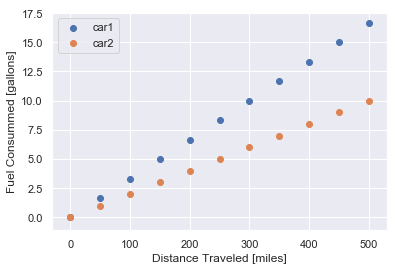

In [51]:
plt.scatter(car1['miles'], car1['gallons'], label='car1')
plt.scatter(car2['miles'], car2['gallons'], label='car2')
plt.xlabel('Distance Traveled [miles]')
plt.ylabel('Fuel Consummed [gallons]')
plt.legend()

In [53]:
# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
   return np.mean(miles/gallons )
car1['mpg'] = efficiency_model(car1['miles'], car1['gallons'])
car2['mpg'] = efficiency_model(car2['miles'], car2['gallons'])

if car1['mpg'] > car2['mpg']:
    print('car1 is the best car')
elif car1['mpg'] < car2['mpg']:
    print('car2 is the best car')
else:
    print('the cars have the same efficiency')


the cars have the same efficiency


### Mean, Deviation, & Standard Deviation
The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.

In [55]:
#let's define x and y array
x = np.array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])

y = np.array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073])

In [56]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.mean(x)
zy = dy / np.mean(y)

Text(0,0.5,'Normalized Deviation of x and y')

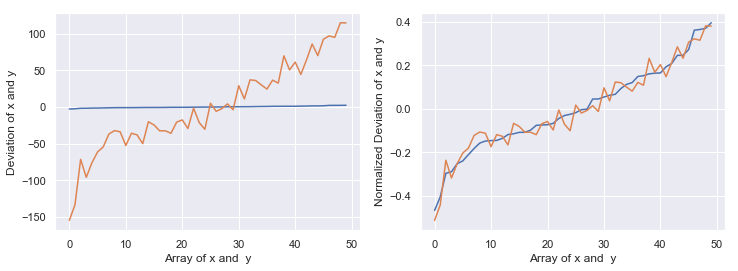

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(dx)
plt.plot(dy)
plt.xlabel('Array of x and  y')
plt.ylabel('Deviation of x and y')
plt.subplot(122)
plt.plot(zx)
plt.plot(zy)
plt.xlabel('Array of x and  y')
plt.ylabel('Normalized Deviation of x and y')